<a href="https://colab.research.google.com/github/aurnam18/Additional-project/blob/master/DBSCAN_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Starter Code

Import all the required libraries.

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from numpy import where
import matplotlib.pyplot as plt

### The Dataset

Wholesale customers data: The data is hosted on the UCI Machine Learning repository. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

[Link to dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv)

The following command imports the dataset from the file you downloaded:

In [55]:
dataset = pd.read_csv('customers.csv')

Let’s explore the data a little bit by checking the number of rows and columns in it.

In [56]:
dataset.shape

(440, 8)

It will give (440, 8) as output which means our dataset has 440 rows and 8 columns.

To see the first five rows of the dataset, we can use head():

In [57]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


FRESH: annual spending (m.u.) on fresh products (Continuous) <br />
MILK: annual spending (m.u.) on milk products (Continuous) <br />
GROCERY: annual spending (m.u.)on grocery products (Continuous) <br />
FROZEN: annual spending (m.u.)on frozen products (Continuous) <br />
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) <br />
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)

Let's the columns Milk and Grocery.

We'll check the dataset by visualizing it in a plot.

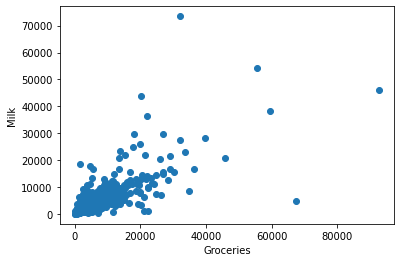

In [58]:
# Create variable x and set it to the Grocery column
X = dataset['Grocery'].values
# Create variable y and set it to the Milk column
y = dataset['Milk'].values
# Create a scatter plot of x,y
plt.scatter(X, y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

Because the values of the data are in the thousands, you are going to normalize each attribute by scaling it to 0 mean and unit variance. What is does basically is it helps to keep the inter-relationships between the features intact so that a small change in one feature would reflect in the other.

In [59]:
dataset = dataset[["Grocery", "Milk"]]
stscaler = StandardScaler().fit(dataset)
dataset = stscaler.transform(dataset)

### Determine the Epsilon

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [60]:
# Create a variable named neigh and set it equal to NearestNeighbors(n_neighbors=2)
neigh = NearestNeighbors(n_neighbors=2)
# Fit dataset to the model as a variable called nbrs
nbrs = neigh.fit(dataset)
# Set distances, indices equal to nbrs.kneighbors(dataset)
distances, indices = nbrs.kneighbors(dataset)

Next, we sort and plot results.

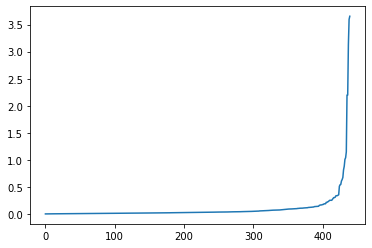

In [61]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature.

### Define the Model and Anomaly Detection

We'll define the model by using the DBSCAN class of Scikit-learn API. We'll define the 'eps' and 'min_sample' in the arguments of the class. The argument 'eps' is the distance between two samples to be considered as a neighborhood and 'min_samples' is the number of samples in a neighborhood.

In [62]:
# Create a DBSCAN model and use the appropriate esp according to the graph above
# Use 15 as min_samples
dbscan = DBSCAN(eps = 0.7, min_samples = 15)
print(dbscan) 

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)


We'll fit the model with x dataset and get the prediction data with the fit_predict() method.

In [63]:
# Get prediction data from your model using fit_predict()
pred = dbscan.fit_predict(dataset)

Next, we'll extract the negative outputs as the outliers.

In [64]:
anom_index = where(pred == -1)
values = dataset[anom_index]

Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.

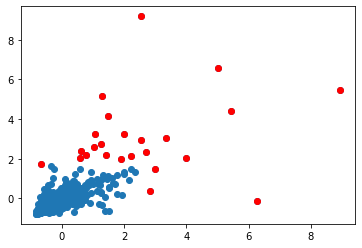

In [65]:
plt.scatter(dataset[:,0], dataset[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

Now we've found the outliers!

Lining up with the intuition, the DBSCAN algorithm was able to identify one cluster of customers who are around the mean grocery and mean milk product purchases. In addition, it was able to flag customers whose annual purchasing behavior deviated too heavily from other customers.

Because the outliers corresponded to customers with more extreme purchasing behavior, the wholesale distributor could specifically target these customers with exclusive discounts to encourage larger purchases.